In [712]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics 
from sklearn import svm

In [713]:
#read in the data using pandas
df = pd.read_csv(Path.cwd().parent / "data" / "07_final_dataset.csv")
df_raw = pd.read_csv(Path.cwd().parent / "data" / "05_dataset_before_corr_mat.csv")
to_drop = [col for col in df.columns if "Unnamed" in col.split(":")]
df = df.drop(columns=to_drop)
print(df.shape)

(4628, 27)


In [714]:
# usa = 1 else = 0
df.loc[df["country_code"] == "840", "country_code"] = 1
df.loc[df["country_code"] != "840", "country_code"] = 0
df["country_code"] = df["country_code"].astype(bool).astype("category")

In [715]:
df["artist_name"] = df["artist_name"].astype("category")

Int64Index([304], dtype='int64')

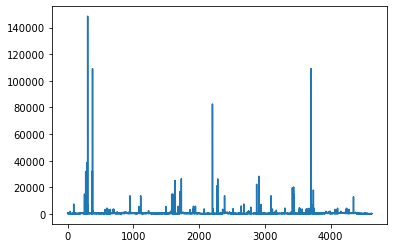

In [716]:
# from matplotlib import pyplot as plt
idx = df.loc[df["words_count"] == df["words_count"].max(), :].index
df["words_count"].plot()
idx

In [717]:
idx = df.loc[df["words_count"] > 10000, :].index
idx

Int64Index([ 256,  272,  274,  275,  276,  283,  292,  294,  295,  303,  304,
             375,  377,  378,  947, 1110, 1582, 1598, 1631, 1708, 1728, 2201,
            2271, 2281, 2385, 2873, 2908, 3092, 3416, 3435, 3440, 3700, 3735,
            4345],
           dtype='int64')

In [718]:
df.drop(index=idx, inplace=True)

In [719]:
# df.loc[df["words_count"] < 250, "words_count"] = 0
df.loc[df["words_count"] < 350, "words_count"] = 0
# df.loc[np.logical_and(df["words_count"] >= 250, df["words_count"] < 500), "words_count"] = 1
df.loc[df["words_count"] >= 350, "words_count"] = 1
# df.loc[df["words_count"] >= 500, "words_count"] = 2
df["words_count"] = df["words_count"].astype("category")

In [720]:
# for j, row in df1.iterrows():
#      if 0 < df1.loc[j, "words_count"] < 
#         df1.loc[j, "words_count"] = 1 if df1.loc[j, "words_count"] > med else 0
# df1["words_count"] = df1["words_count"].astype(bool).astype("category")

# Remove Outliers

In [721]:
# take all numerics
quatiative = df.select_dtypes(exclude=['category'])

# boundaries for chaking outliers
upper_bound = quatiative.mean() + 3 * quatiative.std()
lower_bound = quatiative.mean() - 3 * quatiative.std()

outliers = []

for num, row in quatiative.iterrows():
    outliers_in_row = [1 for col in quatiative.columns if row[col] > upper_bound[col] or row[col] < lower_bound[col]].count(1)    
    # add this index(row) if 15% of it's content is outlaiered
    if outliers_in_row > 0.1 * len(row):
        outliers.append(num)

print(f"Number of indexes with 30% outliers of it's content are: {outliers}")

Number of indexes with 30% outliers of it's content are: 0


In [722]:
df["is_explicit_content"] = df["is_explicit_content"].astype("int").astype("category")

genres = ['pop', 'rock', 'rap', 'country', 'edm', 'house', 'metal', 'soul', 'r&b', 'electro',
          'hip hop', 'funk', 'folk', 'disco', 'other_genre']
# for c in genres:
#     df[c] = df[c].astype("category")

In [723]:
df.dtypes

artist_name            category
artist_popularity         int64
artist_followers          int64
track_popularity          int64
track_danceability      float64
track_energy            float64
track_loudness          float64
track_tempo             float64
track_duration_ms         int64
is_explicit_content    category
words_count            category
country_code           category
pop                       int64
rock                      int64
rap                       int64
country                   int64
edm                       int64
house                     int64
metal                     int64
soul                      int64
r&b                       int64
electro                   int64
hip hop                   int64
funk                      int64
folk                      int64
disco                     int64
other_genre               int64
dtype: object

# Normalization

In [724]:
# df.describe()

In [725]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ["artist_popularity","artist_followers","track_popularity", "track_tempo", "track_loudness", "track_duration_ms"]
for c in cols_to_scale:
    scaler = MinMaxScaler() 
    scaled_values = scaler.fit_transform(df[c].to_numpy().reshape(-1, 1)) 
    df.loc[:,c] = scaled_values

In [726]:
df.describe()

,artist_popularity,artist_followers,track_popularity,track_danceability,track_energy,track_loudness,track_tempo,track_duration_ms,pop,rock,...,house,metal,soul,r&b,electro,hip hop,funk,folk,disco,other_genre
count,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,...,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000
mean,0.653502,0.064251,0.545261,0.603929,0.670435,0.775219,0.455918,0.201867,0.194384,0.177405,...,0.012190,0.070091,0.031781,0.041576,0.002830,0.130605,0.015237,0.018720,0.013278,0.316282
std,0.157266,0.133210,0.255206,0.168816,0.203012,0.107722,0.178985,0.065454,0.395769,0.382053,...,0.109744,0.255329,0.175435,0.199640,0.053126,0.337005,0.122509,0.135549,0.114476,0.465075
min,0.000000,0.000000,0.000000,0.068900,0.004700,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.564706,0.003673,0.469388,0.492000,0.539000,0.732534,0.308261,0.161731,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.658824,0.014313,0.612245,0.613000,0.695000,0.797957,0.451688,0.191700,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.764706,0.057374,0.714286,0.728000,0.833000,0.849511,0.573721,0.228939,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.981000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [727]:
X = df.drop(columns=["is_explicit_content"])
y = df["is_explicit_content"]

# All in one

In [728]:
from sklearn.model_selection import GridSearchCV

params_decision_tree = {"max_depth": [7,9,15], "min_samples_split": [3,5,7,10]}
params_random_forest = {"n_estimators": [150,200, 250],"max_depth": [7,11,15]}
params_knn = {"n_neighbors": range(3, 20)}

clf_params = [(DecisionTreeClassifier(), params_decision_tree),
             (RandomForestClassifier(), params_random_forest), 
             (KNeighborsClassifier(), params_knn)]
             

for idx, (clf, params) in enumerate(clf_params):
    clf_cv = GridSearchCV(clf,params,cv=10)
    clf_cv.fit(X,y)
    print(alg_names[idx])
    print("==========================")
    print(f"best params are: {clf_cv.best_params_}")
    print(f"best score is: {clf_cv.best_score_}")

decision tree
best params are: {'max_depth': 7, 'min_samples_split': 7}
best score is: 0.8300052098133939
random forest
best params are: {'max_depth': 11, 'n_estimators': 250}
best score is: 0.8585156768021218
KNN
best params are: {'n_neighbors': 6}
best score is: 0.7549142748886994


In [730]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = RandomForestClassifier(max_depth=11, n_estimators=250)
clf.fit(X_train, y_train)
targets=["without explicit content", "with explicit content"]
print("Test Results:")
print("==============")
print(metrics.classification_report(y_true=y_test, y_pred=y_pred, target_names=targets))

Test Results:
                          precision    recall  f1-score   support

without explicit content       0.84      0.94      0.89       947
   with explicit content       0.83      0.61      0.71       432

                accuracy                           0.84      1379
               macro avg       0.84      0.78      0.80      1379
            weighted avg       0.84      0.84      0.83      1379

